## Steps and Tasks :

### Step 1 : Reading and understanding of data

### Step 2 : Data cleaning and Preparation

### Step 3 : Visualizing the data

### Step 4 : Deriving new features

### Step 5 : Train-Test Split and feature scaling

### Step 6 : Model Building

### Step 7 : Accuracy and Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\91834\\Downloads\\Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

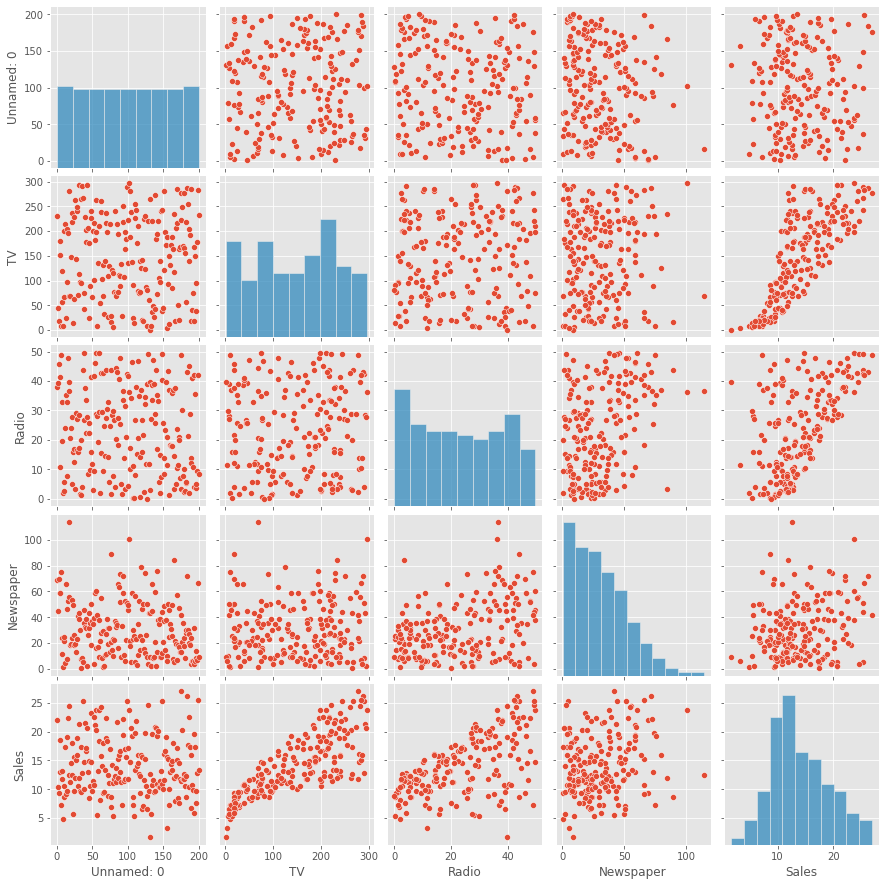

In [7]:
# Check for corelation between data
plt.style.use('ggplot')
g = sns.pairplot(df)

<AxesSubplot:>

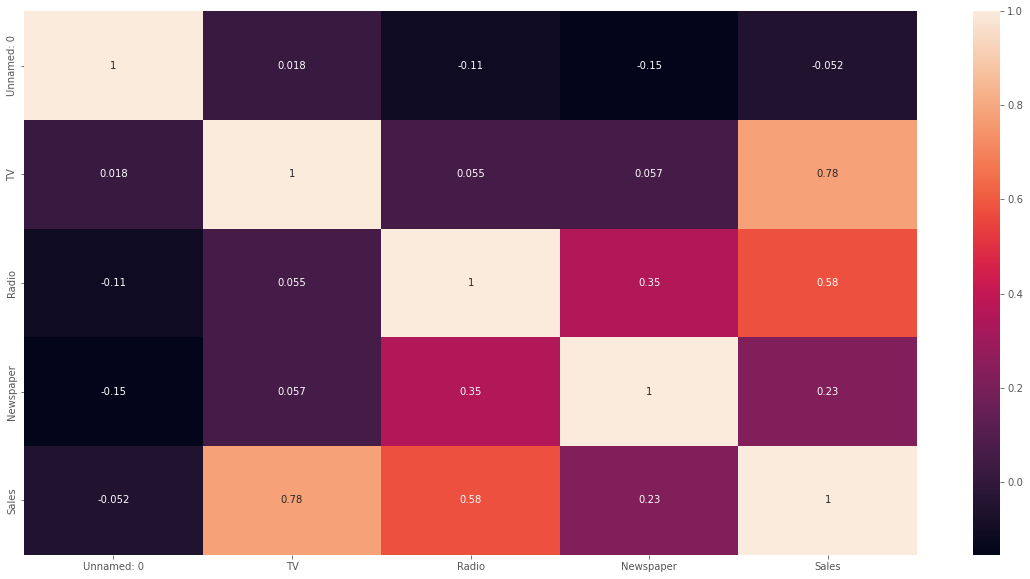

In [8]:
# Correlation
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [9]:
# Slice the dataframe into features and target
df_features = df.iloc[:, :-1]
df_target = df.iloc[:,-1:]

In [10]:
# Spliting dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_features, df_target, train_size = 0.8, random_state=111)

In [11]:
X_train.shape, X_test.shape

((160, 4), (40, 4))

In [12]:
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
scaler = RobustScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=df.columns[:-1])
X_test = pd.DataFrame(scaler.transform(X_test), columns=df.columns[:-1])

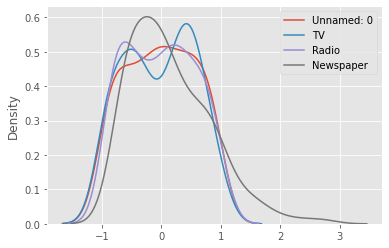

In [13]:
for i in range(len(df.columns[:-1])):
    sns.kdeplot(X_train[df.columns[i]], label = df.columns[i])
    
plt.xlabel("")
plt.legend()

In [14]:
# Importing library
from sklearn.linear_model import Ridge

# Initialize the regressor with default alpha value (alpha = 1.0)
regressor_ridge = Ridge(alpha = 1.0)

# Fit the model to train set
regressor_ridge.fit(X_train, Y_train)

Ridge()

In [15]:
ridge_pred = regressor_ridge.predict(X_test)

In [16]:
ridge_prediction_df = pd.DataFrame(data = ridge_pred, columns=['Predicted rates'])

ridge_prediction_df['Actual rates'] = Y_test.values

ridge_prediction_df.head()

,Predicted rates,Actual rates
0,8.021215,9.7
1,9.941206,11.0
2,10.682488,6.6
3,8.845547,5.7
4,17.069393,12.8


In [17]:
# Printing intercept
print(regressor_ridge.intercept_)

[14.22266671]


In [18]:
# Printing coefficients
print(regressor_ridge.coef_)

[[-0.27112145  6.13079706  4.6844198  -0.20417119]]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

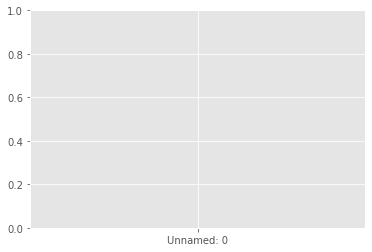

In [19]:
col_names = ['Unnamed: 0','TV','Radio','Newspaper','Sales']
ridge_coef = [-0.25291946,  0.15197465,  0.27604534,  2.45129327, -2.73033591,  2.87737035,  -0.45548257, -4.17993941,  4.68621419,
        -3.80956884, -2.52275102,  0.22820584,  -4.98930303]
ridge_coef.sort()
plt.bar(col_names, ridge_coef, width=0.4)
plt.xticks(rotation = 'vertical')
plt.show()